In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.custom_pytorch_implementation.create_image_auto import (
    Camera,
    create_image_full_auto_multiple_gaussians_with_splat_gaussians,
)
from splat.custom_pytorch_implementation.create_image_custom import (
    create_image_full_custom_multiple_gaussians_with_splat_gaussians,
)
from splat.gaussians import Gaussians
from splat.render_engine.gaussianScene2 import GaussianScene2


def return_gaussians() -> Gaussians:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    point_3d1 = torch.tensor([[0.101, 0.1001, 4]], dtype=torch.float32, device=device).requires_grad_(
        True
    )
    r1 = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float32, device=device).requires_grad_(
        True
    )
    s1 = torch.tensor([[0.1, 0.15, 0.2]], dtype=torch.float32, device=device).requires_grad_(True)
    color1 = torch.tensor([0.4, 0.6, 0.8], dtype=torch.float32, device=device).requires_grad_(True)
    opacity1 = torch.tensor([0.5], dtype=torch.float32, device=device).requires_grad_(True)

    point_3d2 = torch.tensor(
        [[0.0999, 0.0999, 4.1]], dtype=torch.float32, device=device
    ).requires_grad_(True)
    r2 = torch.tensor([[0.2, 0.04, 0.03, 0.001]], dtype=torch.float32, device=device).requires_grad_(
        True
    )
    s2 = torch.tensor([[0.2, 0.16, 0.1]], dtype=torch.float32, device=device).requires_grad_(True)
    color2 = torch.tensor([0.1, 0.15, 0.2], dtype=torch.float32, device=device).requires_grad_(True)
    opacity2 = torch.tensor([0.9], dtype=torch.float32, device=device).requires_grad_(True)

    return Gaussians(
        points=torch.stack([point_3d1, point_3d2]).squeeze(1),
        colors=torch.stack([color1, color2]).squeeze(1),
        scales=torch.stack([s1, s2]).squeeze(1),
        quaternions=torch.stack([r1, r2]).squeeze(1),
        opacity=torch.stack([opacity1, opacity2]).squeeze(1),
        requires_grad=True
    )


def return_camera() -> Camera:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    focal_x = torch.tensor([100.0], device=device)
    focal_y = torch.tensor([100.0], device=device)
    width = 32
    height = 32
    camera_rotation = torch.tensor([1, 0, 0, 0], device=device).unsqueeze(0)
    camera_translation = torch.tensor([[-0.1, -0.1, 0.0]], device=device)

    return Camera(
        focal_x=focal_x,
        focal_y=focal_y,
        c_x=0.0,
        c_y=0.0,
        width=width,
        height=height,
        camera_rotation=camera_rotation,
        camera_translation=camera_translation,
        device=device
    )


def return_gt_image() -> torch.Tensor:
    gt_image = Image.open("gt.png")
    gt_image = np.array(gt_image) / 255.0
    return torch.tensor(gt_image)


def preprocess_for_gaussian_scene(camera: Camera, gaussian_scene: GaussianScene2) -> Gaussians:
    extrinsic_matrix = camera.extrinsic_matrix
    intrinsic_matrix = camera.intrinsic_matrix
    focal_x = camera.focal_x
    focal_y = camera.focal_y
    width = camera.width
    height = camera.height
    tile_size = 16
    preprocessed_gaussians = gaussian_scene.preprocess(
        extrinsic_matrix=extrinsic_matrix,
        intrinsic_matrix=intrinsic_matrix,
        focal_x=focal_x,
        focal_y=focal_y,
        width=width,
        height=height,
        tile_size=tile_size,
    )
    return preprocessed_gaussians

/home/da2986/intro_to_gaussian_splatting/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


all_final_means_2d [tensor([[ 3.3907, 14.2891,  5.0000]], device='cuda:0', grad_fn=<CatBackward0>), tensor([[16.6814, 16.6814,  5.1000]], device='cuda:0', grad_fn=<CatBackward0>)]
all_opacity [tensor([0.5000], device='cuda:0', grad_fn=<SliceBackward0>), tensor([0.9000], device='cuda:0', grad_fn=<SliceBackward0>)]
all_color [tensor([[0.4000, 0.6000, 0.8000]], device='cuda:0', grad_fn=<SliceBackward0>), tensor([[0.1000, 0.1500, 0.2000]], device='cuda:0', grad_fn=<SliceBackward0>)]
inverted_covariance [tensor([[[0.1467, 0.0017],
         [0.0017, 0.0693]]], device='cuda:0', grad_fn=<CopySlices>), tensor([[[ 0.0445, -0.0048],
         [-0.0048,  0.0706]]], device='cuda:0', grad_fn=<CopySlices>)]
current_t tensor(1.)
alpha tensor([[0.0005]], device='cuda:0', grad_fn=<MulBackward0>)
color tensor([[0.4000, 0.6000, 0.8000]], device='cuda:0', grad_fn=<SliceBackward0>)
current_t tensor(1.)
alpha tensor([[1.7703e-06]], device='cuda:0', grad_fn=<MulBackward0>)
color tensor([[0.1000, 0.1500, 0.2000

/home/da2986/intro_to_gaussian_splatting/splat/custom_pytorch_implementation/auto_functions.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return final_color, torch.tensor(current_T)


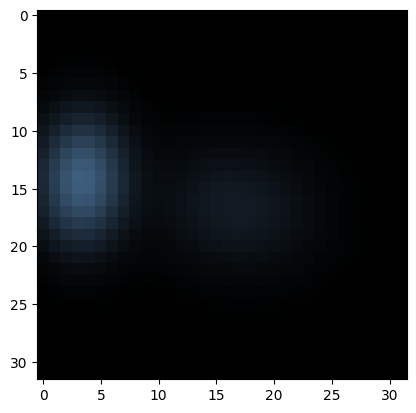

means tensor([[ 3.3907, 14.2891,  5.0000],
        [16.6814, 16.6814,  5.1000]], device='cuda:0', grad_fn=<CopySlices>)
opacity tensor([0.5000, 0.9000], device='cuda:0', grad_fn=<IndexBackward0>)
color tensor([[0.4000, 0.6000, 0.8000],
        [0.1000, 0.1500, 0.2000]], device='cuda:0', grad_fn=<IndexBackward0>)
inverted_covariance_2d tensor([[[ 0.1467,  0.0017],
         [ 0.0017,  0.0693]],

        [[ 0.0445, -0.0048],
         [-0.0048,  0.0706]]], device='cuda:0', grad_fn=<CopySlices>)


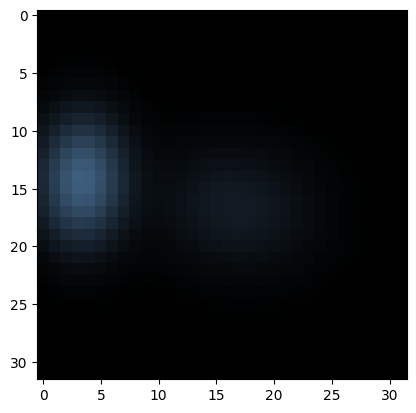

True


In [2]:
camera = return_camera()
gaussians = return_gaussians()
# gt_image = return_gt_image()

output_auto1 = create_image_full_auto_multiple_gaussians_with_splat_gaussians(
    camera, gaussians, camera.height, camera.width
)
plt.imshow(output_auto1.detach().cpu().numpy())
plt.show()
# output_custom = create_image_full_custom_multiple_gaussians_with_splat_gaussians(
#     camera, gaussians, camera.height, camera.width
# )
# print(torch.allclose(output_auto1, output_custom))

gaussian_scene = GaussianScene2(gaussians=gaussians)
preprocessed_gaussians = preprocess_for_gaussian_scene(camera, gaussian_scene)
output_scene = gaussian_scene.render_cuda(
    preprocessed_gaussians=preprocessed_gaussians,
    height=camera.height,
    width=camera.width,
    tile_size=16,
)
plt.imshow(output_scene.detach().cpu().numpy())
plt.show()
print(torch.allclose(output_auto1, output_scene, atol=1e-5))

In [3]:
output_auto1[0, 3]

tensor([0., 0., 0.], device='cuda:0', grad_fn=<SelectBackward0>)

In [4]:
output_scene[0, 3]

tensor([0., 0., 0.], device='cuda:0')

In [5]:
# Find pixel location with maximum difference between images
diff = torch.abs(output_scene - output_auto1)
max_diff = torch.max(diff.sum(dim=-1))  # Sum across color channels
max_diff_idx = torch.argmax(diff.sum(dim=-1))  # Get flattened index

# Convert flat index to 2D coordinates
h = max_diff_idx // camera.width
w = max_diff_idx % camera.width

print(f"Maximum difference occurs at pixel ({h}, {w})")
print(f"Scene value: {output_scene[h,w]}")
print(f"Auto value: {output_auto1[h,w]}")


Maximum difference occurs at pixel (12, 2)
Scene value: tensor([0.1792, 0.2688, 0.3583], device='cuda:0')
Auto value: tensor([0.1792, 0.2688, 0.3583], device='cuda:0', grad_fn=<SelectBackward0>)


/var/tmp/ipykernel_25952/1678247111.py:7: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  h = max_diff_idx // camera.width
